<a href="https://colab.research.google.com/github/BrainConnection/Quantum_Algorithm/blob/main/6.%205Q%20TFIM%20Q%20-Supremacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [7]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-algorithms
!pip install qiskit-aer

!pip install scipy
!pip install matplotlib

In [8]:
from functools import cache

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")

In [9]:
seed_list = [1,   4,   5,   6,   7,   8,  10,  11,  12,  13,
14,  15,  17,  18,  19,  20,  21,  23,  24,  25,
27,  28,  29,  30,  31,  34,  36,  38,  39,  40,
41,  42,  43,  45,  46,  47,  48,  49,  51,  52,
55,  59,  61,  63,  65,  66,  67,  68,  70,  71,
74,  75,  76,  77,  78,  81,  86,  87,  90,  93,
95,  96,  97,  101, 102, 103, 104, 105, 106, 107,
112, 113, 114, 116, 118, 121, 124, 126, 127, 128,
132, 133, 135, 136, 137, 138, 139, 140, 141, 142,
144, 147, 148, 149, 150, 151, 152, 154, 155, 162,
165, 166, 169, 171, 172, 174]

# Hamiltonian Diagonalization

$$ H = Σ Z_j Z_{j+1} - Σ X_j  $$

1D 5 Qubit System

In [10]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
import matplotlib.pyplot as plt

In [11]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
hamiltonian_matrix = hamiltonian.to_matrix()

eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

lowest_energy = np.min(eigenvalue)

np.real(lowest_energy)

-6.155367074350501

In [12]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
hamiltonian_matrix = hamiltonian.to_matrix()

eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

lowest_energy = np.min(eigenvalue)

np.real(lowest_energy)

-6.026674183332294

# NN in Noiseless Simulator


1. Only Apply Hadamard Gate for (P)QC

2. Measure each probability of bitstring and Connect Neural Net Layer, Optimize Parameters in Neural Net

## Ansatz, Hamiltonian, Sampler & Estimator Setting

In [31]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize

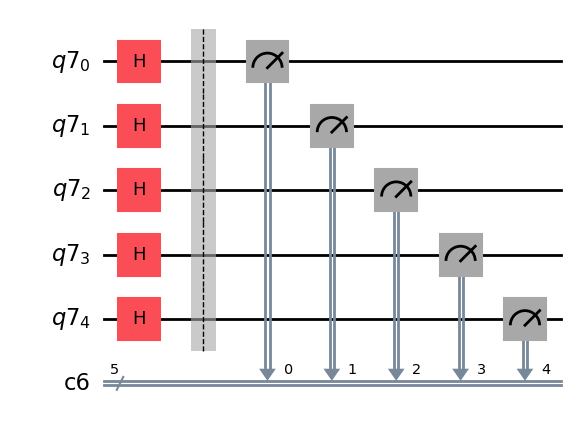

In [32]:
# Ansatz for VQNHE ZZ Measurement

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatz_zz = QuantumCircuit(qbit, cbit)

ansatz_zz.h(range(0,5))

ansatz_zz.barrier()

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

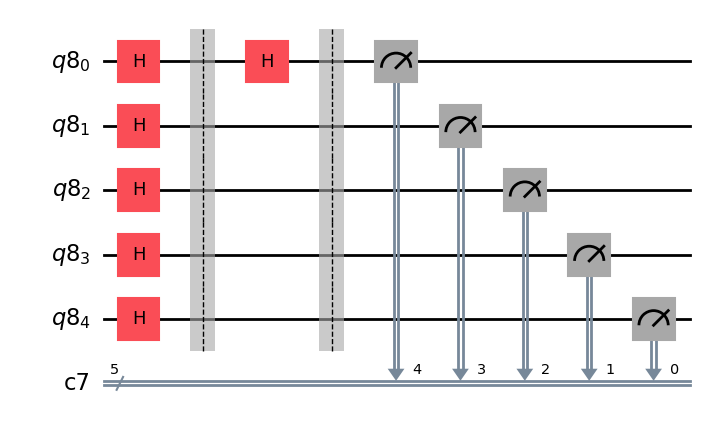

In [33]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = QuantumCircuit(qbit0, cbit0)

ansatz_x0.h(range(0,5))

ansatz_x0.barrier()

ansatz_x0.h(0)

ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

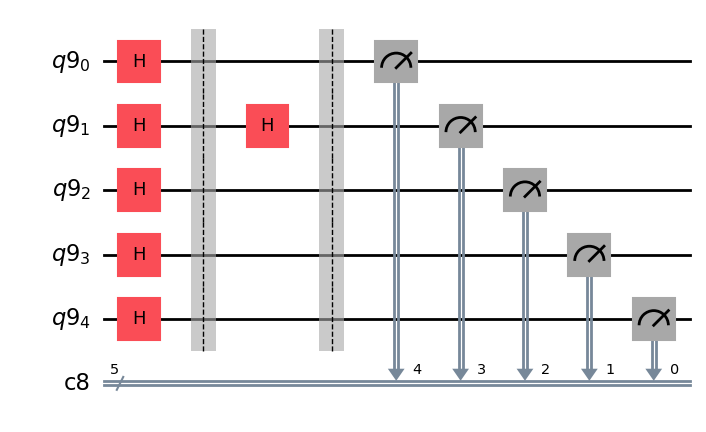

In [34]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = QuantumCircuit(qbit1, cbit1)

ansatz_x1.h(range(0,5))

ansatz_x1.barrier()

ansatz_x1.h(1)

ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

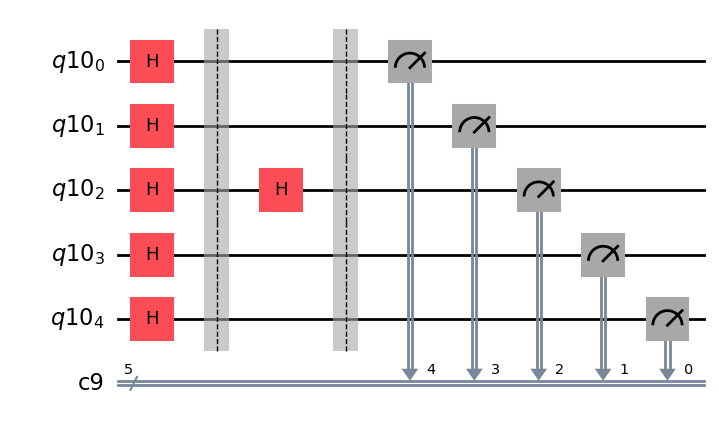

In [35]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = QuantumCircuit(qbit2, cbit2)

ansatz_x2.h(range(0,5))

ansatz_x2.barrier()

ansatz_x2.h(2)

ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

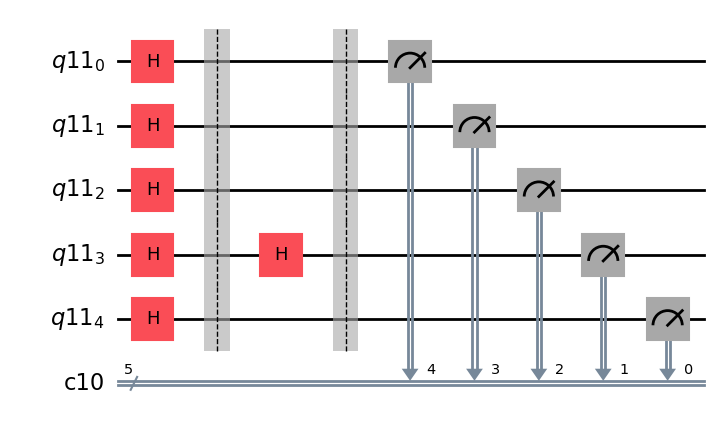

In [36]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = QuantumCircuit(qbit3, cbit3)

ansatz_x3.h(range(0,5))

ansatz_x3.barrier()

ansatz_x3.h(3)

ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

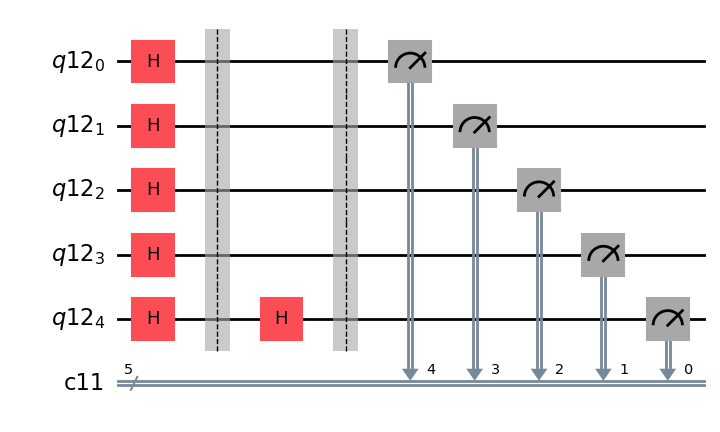

In [37]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = QuantumCircuit(qbit4, cbit4)

ansatz_x4.h(range(0,5))

ansatz_x4.barrier()

ansatz_x4.h(4)

ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

In [38]:
# Estimator & Sampler

estimator = Estimator()
sampler = Sampler()

## Cost Function for VQNHE

In [39]:
prob_string_zz = {0: 0.03125, 1: 0.03125, 2: 0.03125, 3: 0.03125, 4: 0.03125, 5: 0.03125, 6: 0.03125, 7: 0.03125, 8: 0.03125, 9: 0.03125, 10: 0.03125, 11: 0.03125, 12: 0.03125, 13: 0.03125, 14: 0.03125, 15: 0.03125, 16: 0.03125, 17: 0.03125, 18: 0.03125, 19: 0.03125, 20: 0.03125, 21: 0.03125, 22: 0.03125, 23: 0.03125, 24: 0.03125, 25: 0.03125, 26: 0.03125, 27: 0.03125, 28: 0.03125, 29: 0.03125, 30: 0.03125, 31: 0.03125}
prob_string_x0 = {0: 0.0625, 1: 0.0625, 2: 0.0625, 3: 0.0625, 4: 0.0625, 5: 0.0625, 6: 0.0625, 7: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.0625, 11: 0.0625, 12: 0.0625, 13: 0.0625, 14: 0.0625, 15: 0.0625, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0}
prob_string_x1 = {0: 0.0625, 1: 0.0625, 2: 0.0625, 3: 0.0625, 4: 0.0625, 5: 0.0625, 6: 0.0625, 7: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.0625, 19: 0.0625, 20: 0.0625, 21: 0.0625, 22: 0.0625, 23: 0.0625, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0}
prob_string_x2 = {0: 0.0625, 1: 0.0625, 2: 0.0625, 3: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.0625, 11: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.0625, 19: 0.0625, 24: 0.0625, 25: 0.0625, 26: 0.0625, 27: 0.0625, 4: 0, 5: 0, 6: 0, 7: 0, 12: 0, 13: 0, 14: 0, 15: 0, 20: 0, 21: 0, 22: 0, 23: 0, 28: 0, 29: 0, 30: 0, 31: 0}
prob_string_x3 = {0: 0.0625, 1: 0.0625, 4: 0.0625, 5: 0.0625, 8: 0.0625, 9: 0.0625, 12: 0.0625, 13: 0.0625, 16: 0.0625, 17: 0.0625, 20: 0.0625, 21: 0.0625, 24: 0.0625, 25: 0.0625, 28: 0.0625, 29: 0.0625, 2: 0, 3: 0, 6: 0, 7: 0, 10: 0, 11: 0, 14: 0, 15: 0, 18: 0, 19: 0, 22: 0, 23: 0, 26: 0, 27: 0, 30: 0, 31: 0}
prob_string_x4 = {0: 0.0625, 2: 0.0625, 4: 0.0625, 6: 0.0625, 8: 0.0625, 10: 0.0625, 12: 0.0625, 14: 0.0625, 16: 0.0625, 18: 0.0625, 20: 0.0625, 22: 0.0625, 24: 0.0625, 26: 0.0625, 28: 0.0625, 30: 0.0625, 1: 0, 3: 0, 5: 0, 7: 0, 9: 0, 11: 0, 13: 0, 15: 0, 17: 0, 19: 0, 21: 0, 23: 0, 25: 0, 27: 0, 29: 0, 31: 0}

In [40]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))

In [41]:
# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  W1 = parameter[0:25]
  W2 = parameter[25:30]
  c = parameter[30]

  W1 = W1.reshape(5,5)
  W2 = W2.reshape(1,5)

  a1 = np.matmul(W1, x)
  z1 = relu(a1)

  a2 = np.matmul(W2, z1)
  y = output_activate(c, a2)

  return y[0]

In [42]:
# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)

In [43]:
def Z0Z1(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval

In [44]:
def X0(params_nn):
  prob_string = prob_string_x0
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn):
  prob_string = prob_string_x1
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn):
  prob_string = prob_string_x2
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn):
  prob_string = prob_string_x3
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn):
  prob_string = prob_string_x4
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval

In [45]:
def norm(params_nn):
  prob_string = prob_string_zz
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [46]:
def cost_func_vqnhe(params_nn):
  expval = 0
  expval = expval + Z0Z1(params_nn)
  expval = expval + Z1Z2(params_nn)
  expval = expval + Z2Z3(params_nn)
  expval = expval + Z3Z4(params_nn)

  expval = expval - X0(params_nn)
  expval = expval - X1(params_nn)
  expval = expval - X2(params_nn)
  expval = expval - X3(params_nn)
  expval = expval - X4(params_nn)

  expval = expval / norm(params_nn)

  return expval

In [47]:
def build_callback_vqnhe(callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Repeat Optimizing Parameters in NN for 10 times

np.random.seed(k)

k 0~100

In [50]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.random.random(31) - 1

  callback = build_callback_vqnhe(callback_dict)

  options = dict()
  options["maxiter"] = 1000
  options["disp"] = True

  res = minimize(
    cost_func_vqnhe,
    x0,
    args=(),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

KeyboardInterrupt: 

In [49]:
local_minimum_list

array([-5.97802591, -5.78144978, -5.8505741 , -5.84080221, -5.19748504,
       -5.73886451, -5.99495258, -5.8863588 , -5.86427549, -5.16013895,
       -5.99380177, -5.74680249, -5.80385412, -6.00038826, -6.00591735,
       -5.73493997, -5.7827342 , -6.02653895, -5.85276993, -5.9774032 ,
       -5.20975616, -5.17751259, -6.02487535, -6.02105618, -5.19712368,
       -6.01979897, -5.17031746, -5.9601405 , -5.90842489, -6.01669785,
       -5.97372664, -5.93392285, -5.98037873, -5.86764128, -6.00796554,
       -5.80245108, -5.17357922, -5.88836647, -5.16718519, -5.93711901,
       -5.16371544, -5.83729046, -5.80188904, -5.211359  , -5.92677942,
       -5.68674655, -5.85532464, -6.01047893, -5.835678  , -5.23616432,
       -5.83177456, -6.0078071 , -5.44581915, -5.87125222, -5.78568759,
       -5.9634676 , -6.02529994, -6.00843464, -5.86348396, -5.76293413,
               nan, -5.64340277, -5.19236962, -5.16014236, -5.34220287,
       -5.90232791, -6.01580133,         nan, -5.21824437, -5.84

## Optimized Parameters

In [ ]:
## NN optimized parameter

op_param_nn = np.array([-6.39460622e-01, -9.61049517e-01, -3.44339135e-01, -1.82542009e-01,
       -4.69011457e-01, -4.35652353e-01, -8.01625035e-02, -1.47581304e-01,
        7.81651244e-01,  7.72153254e-01,  5.81877989e-01, -1.90542966e+00,
        1.33083070e+00,  1.01419829e-01, -4.42492658e-01,  3.53054798e-01,
       -9.59032774e-01, -7.66525462e-01, -5.01730326e-01, -6.84175387e-01,
       -6.08245411e-02,  6.61688334e-01, -2.45080155e-02, -7.97063714e-01,
       -9.22568555e-01, -8.32093713e-01, -4.15146201e-01,  3.09734372e-01,
       -8.88652641e-01, -1.89271086e-01, -4.62710471e-01,  8.08237257e-01,
        2.43848089e-01,  2.15808499e-01, -5.51193529e-01,  3.50405297e-01,
        1.30095768e+00, -4.42047635e-01, -8.01557057e-01,  1.20224764e+00,
       -8.72627138e-01, -2.70768714e-01, -8.59954395e-01, -3.61264586e-01,
       -8.59234810e-01, -2.27578343e-01,  1.02157423e-01,  1.06782224e+00,
        1.98235220e-01, -1.30121773e-02,  2.32036770e-01, -9.89904742e-02,
       -1.07222359e+00, -1.13816697e-01,  4.85603794e-01, -8.01152920e-01,
       -3.54510957e-01,  6.95447285e-01, -4.00095981e-01,  6.51060665e-01,
        5.06932396e-01,  8.14243112e-01, -2.43924231e-01, -2.64644336e-01,
        6.82391136e-01,  4.50670366e-01,  2.07058331e-01,  4.70551571e-01,
        2.84429717e-01,  8.50043064e-01, -4.08719872e-01,  3.79627747e-01,
        1.17438400e+00, -2.98493824e-01,  2.49188893e-02, -2.01159591e-01,
       -3.39767422e-01, -8.39056242e-01, -9.61313275e-01,  1.84313790e-01,
       -1.02182795e-01,  3.15277649e-01,  4.72268301e-01, -1.58147649e-01,
       -3.01364430e-01, -6.23169550e-01,  6.23607573e-01,  6.29746369e-01,
        4.68425975e-01,  7.50369650e-01,  3.76948665e-01, -1.42262230e-01,
       -9.33810640e-01,  5.22035772e-01, -5.25264052e-01, -3.12419973e-01,
       -1.85514432e-01,  2.87569898e-01,  3.17384703e-01,  5.33675795e-01,
       -3.71368953e-01, -6.67174804e-01,  6.43120828e-01, -3.95005237e-01,
       -2.01823318e-01, -8.11402264e-01, -6.67454914e-01, -6.68765489e-01,
       -3.12573386e-01, -2.24313953e-02,  9.46259198e-01,  2.29892767e-01,
       -2.34919179e-01,  2.96668668e-01,  1.76853571e-01,  6.78745531e-01,
       -1.58728217e-01,  8.99571326e-01, -1.68992662e-01, -4.33820514e-01,
       -2.48004619e-02,  8.04415649e-01,  4.61759254e-01, -1.88029557e-02,
       -6.51833345e-02,  3.99367266e-01, -1.91288029e-03,  2.79604319e-01,
        9.42350407e-01,  8.25206814e-01,  6.80561681e-01, -7.57983505e-01,
        1.74827229e-01, -2.68910480e-01,  8.07125234e-01, -3.63347064e-01,
        7.12696226e-01, -7.34541347e-01, -1.59218450e-01,  9.26895100e-01,
        2.25693269e-01,  7.54843871e-01, -9.04674321e-02, -5.63339218e-01,
        4.99968307e-01, -2.01485352e-01, -3.01245675e-01, -1.02177800e+00,
       -7.10161076e-01,  1.15368001e+00,  8.28477955e-01,  7.64913532e-01,
       -3.86225205e-01, -8.98823136e-01,  2.21119867e-01,  5.61932652e-01,
        1.12502908e+00, -8.37215110e-01, -5.34234335e-01, -4.46185897e-03,
       -8.09358583e-01,  6.89300901e-01,  6.59639436e-01, -5.13348447e-01,
       -8.05151098e-01,  8.32565860e-01,  4.97918769e-01, -3.67135583e-01,
       -4.34867195e-02,  8.13233408e-01, -2.76295109e-01, -8.57754078e-01,
        3.89654263e-01, -3.74910481e-01,  3.73169480e-01,  7.88981723e-01,
       -5.59442842e-01, -7.21675349e-01, -8.94096264e-01,  2.96717353e-01,
       -8.38454487e-01,  9.16746888e-01,  4.13893745e-01,  8.11201028e-01,
        6.01129875e-01, -6.12015630e-01, -6.68323692e-01,  9.20070380e-01,
       -4.17924048e-01,  5.67029123e-01, -6.58419704e-01, -1.54022813e-01,
        4.06887809e-01, -5.72715201e-01,  2.95387774e-01,  8.10098921e-01,
       -3.99472142e-01, -6.67432947e-01, -9.44534678e-01, -3.34505803e-01,
       -7.77983883e-01,  1.40930791e-01,  2.34294858e-01,  1.60503194e-01,
        3.38701628e-01,  6.26870945e-02,  7.61063404e-01,  2.53270324e-01,
        7.22785375e-01, -1.16460617e-01, -7.18748229e-01, -6.87994576e-01,
        4.44425542e-01, -5.37891005e-01,  5.88378478e-01,  7.60107790e-01,
        1.01549738e-01, -6.95007577e-01,  2.46993207e-01, -2.76430942e-01,
        8.16895886e-01, -5.74588868e-01, -5.29349472e-01, -3.58613347e-02,
       -1.73821440e-02, -6.24141837e-01, -2.67566824e-01,  3.22337858e-01,
       -5.89599016e-02, -8.87241609e-01, -1.61901062e-01, -4.35465718e-01,
       -3.76278731e-03, -9.89508899e-01, -5.26528384e-01,  1.02733642e+00,
        7.97576230e-01,  9.89823606e-01,  5.17780207e-01,  4.37282833e-02,
        8.75008369e-01, -7.10376976e-01, -4.63965755e-01,  2.56682606e-01,
        1.21318412e-01, -4.64365974e-01, -2.76108570e-01, -5.29278450e-02,
       -4.31956826e-01, -6.06307279e-01, -4.06286188e-01, -9.93935691e-02,
        6.07676075e-01,  2.19619394e-01, -8.49006646e-01,  2.83814178e-02,
       -3.17317005e-01,  5.11458011e-01, -2.68597594e-01, -9.61217668e-01,
        1.06512624e+00, -2.44706184e-01, -3.25374619e-01, -6.27343350e-02,
        7.53709319e-01, -3.58187704e-01, -2.61370472e-01, -2.84238557e-01,
        9.28713874e-01, -8.08741993e-01,  2.07290741e+00])

## Plot Result of VQNHE in Noiseless Simulator

Neural Net Lowest Energy Configurations for 10 times

[-6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02544544, -6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02667418]

VQfixedNHE Lowest Energy Configuration

[-6.026673976585643]

VQNHE Lowest Energy Configuration for 100 times

[-5.8392458 , -5.87546176, -5.83924655, -5.8402692 , -5.94158523, -5.8751673 , -5.94158524, -5.94158525, -5.94158523, -5.78074357, -5.94158524, -5.94158525, -5.94158524, -5.77757292, -5.94145631, -5.93439034, -5.91385498, -5.94158136, -5.94158525, -5.77810274, -5.780743, -5.941585, -5.941585, -5.941585, -5.941503, -5.94158525, -5.78074364, -5.87516718, -5.88974625, -5.94158525, -5.9415852 , -5.93299599, -5.94158524, -5.90888822, -5.9316028 , -5.94158525, -5.9380279 , -5.80099864, -5.7535819 , -5.77514423, -5.90469022, -5.94158524, -5.94158523, -5.94158525, -5.83924657, -5.94158524, -5.93917358, -5.94154199, -5.84026916, -5.77825212, -5.93705511, -5.78074338, -5.94156212, -5.94158525, -5.93272868, -5.94158525, -5.94158525, -5.86214847, -5.941585 , -5.77816882, -5.81901766, -5.94148885, -5.82826786, -5.83924583, -5.77273822, -5.94158524, -5.84258761, -5.94158525, -5.9415604 , -5.93799288, -5.9415426 , -5.94158525, -5.94158525, -5.94158525, -5.931018 , -5.94158525, -5.78074152, -5.78067298, -5.94148651, -5.94158508, -5.7362738 , -5.91543312, -5.9085967 , -5.94137327, -5.94158525, -5.94158525, -5.78046066, -5.77821064, -5.94158511, -5.93933252, -5.78074348, -5.94158525, -5.94158525, -5.94158523, -5.94158523, -5.94158525, -5.87817228, -5.94137875, -5.79777723, -5.94155634]

VQE Lowest Energy Configuration for 100 times

[-5.82879886, -5.89649831, -5.89460313, -5.87216999, -5.89714665, -5.8970116,
-5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631, -5.89706667, -5.89640049, -5.89686096, -5.84344741, -5.89722894, -5.89514208, -5.89722285, -5.89281514, -5.8954058 , -5.89660128, -5.89722463, -5.8262015 , -5.89560605, -5.83363386, -5.87957003, -5.82656423, -5.89196626, -5.82341307, -5.8972198 ,
-5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954, -5.89066143, -5.89556185, -5.8294686 , -5.89500158, -5.88381387, -5.89720651, -5.86661138, -5.89703354, -5.8971071 , -5.89488588, -5.88977925, -5.89321505, -5.89655454, -5.89722776, -5.89703659, -5.8961525 , -5.89248345, -5.89678098, -5.89358845, -5.82619791, -5.88964449, -5.89599961, -5.89636862, -5.87624267, -5.89717557, -5.89514411, -5.83231881, -5.89722489, -5.89417956, -5.86522879, -5.89603463, -5.82299708, -5.89690459, -5.89513546, -5.88945447, -5.89701515, -5.89144585, -5.89279627, -5.89577581, -5.836521  , -5.88388422, -5.89711739, -5.84467668, -5.89351984, -5.89512836, -5.89677164, -5.87800257, -5.88000114, -5.83970428, -5.88410124, -5.86785946, -5.8962536 , -5.89717338, -5.84988649, -5.892418  , -5.88143104, -5.89473968, -5.89702307, -5.85915542, -5.89705331, -5.89717653, -5.89196071, -5.89641764, -5.88954192, -5.89643247]

In [ ]:
nn_minimum_list = np.array([-6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02544544, -6.02667418, -6.02667418, -6.02667418, -6.02667418, -6.02667418])

In [ ]:
vqfixednhe_minimum = np.array([-6.026673976585643])

In [ ]:
vqnhe_minimum_list = np.array([-5.8392458 , -5.87546176, -5.83924655, -5.8402692 , -5.94158523, -5.8751673 , -5.94158524, -5.94158525, -5.94158523, -5.78074357, -5.94158524, -5.94158525, -5.94158524, -5.77757292, -5.94145631, -5.93439034, -5.91385498, -5.94158136, -5.94158525, -5.77810274, -5.780743, -5.941585, -5.941585, -5.941585, -5.941503, -5.94158525, -5.78074364, -5.87516718, -5.88974625, -5.94158525, -5.9415852 , -5.93299599, -5.94158524, -5.90888822, -5.9316028 , -5.94158525, -5.9380279 , -5.80099864, -5.7535819 , -5.77514423, -5.90469022, -5.94158524, -5.94158523, -5.94158525, -5.83924657, -5.94158524, -5.93917358, -5.94154199, -5.84026916, -5.77825212, -5.93705511, -5.78074338, -5.94156212, -5.94158525, -5.93272868, -5.94158525, -5.94158525, -5.86214847, -5.941585 , -5.77816882, -5.81901766, -5.94148885, -5.82826786, -5.83924583, -5.77273822, -5.94158524, -5.84258761, -5.94158525, -5.9415604 , -5.93799288, -5.9415426 , -5.94158525, -5.94158525, -5.94158525, -5.931018 , -5.94158525, -5.78074152, -5.78067298, -5.94148651, -5.94158508, -5.7362738 , -5.91543312, -5.9085967 , -5.94137327, -5.94158525, -5.94158525, -5.78046066, -5.77821064, -5.94158511, -5.93933252, -5.78074348, -5.94158525, -5.94158525, -5.94158523, -5.94158523, -5.94158525, -5.87817228, -5.94137875, -5.79777723, -5.94155634])

In [ ]:
vqe_minimum_list = np.array([-5.606, -5.71875, -5.60175, -5.698, -5.78125, -5.767, -5.5845, -5.645, -5.69425, -5.51475, -5.56775, -5.75575, -5.769, -5.57125, -5.64275, -5.74275, -5.5175, -5.7255, -5.666, -5.73625, -5.723, -5.7545, -5.6705, -5.60075, -5.52975, -5.6935, -5.61425, -5.6985, -5.69325, -5.6845, -5.73225, -5.72175, -5.6815, -5.31325, -5.7015, -5.70625, -5.68925, -5.738, -5.71325, -5.672, -5.66375, -5.618, -5.6725, -5.6015, -5.615, -5.7535, -5.52925, -5.767, -5.736, -5.7325, -5.647, -5.6445, -5.72275, -5.55, -5.67225, -5.68075, -5.7195, -5.6425, -5.7215, -5.60475, -5.72025, -5.709, -5.58275, -5.7115, -5.7125, -5.6935, -5.6955, -5.53825, -5.53225, -5.52125, -5.64025, -5.644, -5.7355, -5.6575, -5.6785, -5.56625, -5.762, -5.6985, -5.697, -5.63975, -5.61525, -5.68075, -5.76425, -5.7605, -5.699, -5.57325, -5.707, -5.57125, -5.74275, -5.68675, -5.4285, -5.7675, -5.76325, -5.6595, -5.71025, -5.66375, -5.6435, -5.726, -5.67075, -5.62425])

In [ ]:
print(vqfixednhe_minimum)

In [ ]:
mean_nn = np.mean(nn_minimum_list)
var_nn = np.var(nn_minimum_list)
max_nn = np.max(nn_minimum_list)
min_nn = np.min(nn_minimum_list)

print("mean : {0}".format(mean_nn))
print("variance : {0}".format(var_nn))
print("maximum : {0}".format(max_nn))
print("minimum : {0}".format(min_nn))
print()
print(nn_minimum_list)

mean : -6.026551306
variance : 1.3588217888384173e-07
maximum : -6.02544544
minimum : -6.02667418

[-6.02667418 -6.02667418 -6.02667418 -6.02667418 -6.02544544 -6.02667418
 -6.02667418 -6.02667418 -6.02667418 -6.02667418]


In [ ]:
mean_vqnhe = np.mean(vqnhe_minimum_list)
var_vqnhe = np.var(vqnhe_minimum_list)
max_vqnhe = np.max(vqnhe_minimum_list)
min_vqnhe = np.min(vqnhe_minimum_list)

print("mean : {0}".format(mean_vqnhe))
print("variance : {0}".format(var_vqnhe))
print("maximum : {0}".format(max_vqnhe))
print("minimum : {0}".format(min_vqnhe))
print()
print(vqnhe_minimum_list)

mean : -6.026551306
variance : 1.3588217888384173e-07
maximum : -6.02544544
minimum : -6.02667418

[-6.02667418 -6.02667418 -6.02667418 -6.02667418 -6.02544544 -6.02667418
 -6.02667418 -6.02667418 -6.02667418 -6.02667418]


In [ ]:
mean_vqe = np.mean(vqe_minimum_list)
var_vqe = np.var(vqe_minimum_list)
max_vqe = np.max(vqe_minimum_list)
min_vqe = np.min(vqe_minimum_list)

print("mean : {0}".format(mean_vqe))
print("variance : {0}".format(var_vqe))
print("maximum : {0}".format(max_vqe))
print("minimum : {0}".format(min_vqe))
print()
print(vqe_minimum_list)

mean : -5.8822224289000005
variance : 0.0005472796114355233
maximum : -5.82299708
minimum : -5.89722894

[-5.82879886 -5.89649831 -5.89460313 -5.87216999 -5.89714665 -5.8970116
 -5.82318112 -5.88723766 -5.87906279 -5.89633351 -5.89712631 -5.89706667
 -5.89640049 -5.89686096 -5.84344741 -5.89722894 -5.89514208 -5.89722285
 -5.89281514 -5.8954058  -5.89660128 -5.89722463 -5.8262015  -5.89560605
 -5.83363386 -5.87957003 -5.82656423 -5.89196626 -5.82341307 -5.8972198
 -5.82579769 -5.89274968 -5.89058962 -5.89571965 -5.89121954 -5.89066143
 -5.89556185 -5.8294686  -5.89500158 -5.88381387 -5.89720651 -5.86661138
 -5.89703354 -5.8971071  -5.89488588 -5.88977925 -5.89321505 -5.89655454
 -5.89722776 -5.89703659 -5.8961525  -5.89248345 -5.89678098 -5.89358845
 -5.82619791 -5.88964449 -5.89599961 -5.89636862 -5.87624267 -5.89717557
 -5.89514411 -5.83231881 -5.89722489 -5.89417956 -5.86522879 -5.89603463
 -5.82299708 -5.89690459 -5.89513546 -5.88945447 -5.89701515 -5.89144585
 -5.89279627 -5.89577

# VQNHE in Noiseless Simulator

1. Optimize Parameters in PQC

2. Fix Parameters in PQC and Connect Neural Net Layer, Optimize Parameters in Neural Net

## Ansatz, Hamiltonian, Sampler & Estimator Setting

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# Ansatz for VQE

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
# Ansatz for VQNHE ZZ Measurement

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatz_zz = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatz_zz.h(range(0,5))

ansatz_zz.barrier()

ansatz_zz.cx(0, 1)
ansatz_zz.cx(2, 3)
ansatz_zz.rz(next(it), 1)
ansatz_zz.rz(next(it), 3)
ansatz_zz.cx(0, 1)
ansatz_zz.cx(2, 3)
ansatz_zz.cx(1, 2)
ansatz_zz.cx(3, 4)
ansatz_zz.rz(next(it), 2)
ansatz_zz.rz(next(it), 4)
ansatz_zz.cx(1, 2)
ansatz_zz.cx(3, 4)

ansatz_zz.barrier()

ansatz_zz.rx(next(it), 0)
ansatz_zz.rx(next(it), 1)
ansatz_zz.rx(next(it), 2)
ansatz_zz.rx(next(it), 3)
ansatz_zz.rx(next(it), 4)

ansatz_zz.barrier()

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = QuantumCircuit(qbit0, cbit0)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatz_x0.h(range(0,5))

ansatz_x0.barrier()

ansatz_x0.cx(0, 1)
ansatz_x0.cx(2, 3)
ansatz_x0.rz(next(it), 1)
ansatz_x0.rz(next(it), 3)
ansatz_x0.cx(0, 1)
ansatz_x0.cx(2, 3)
ansatz_x0.cx(1, 2)
ansatz_x0.cx(3, 4)
ansatz_x0.rz(next(it), 2)
ansatz_x0.rz(next(it), 4)
ansatz_x0.cx(1, 2)
ansatz_x0.cx(3, 4)

ansatz_x0.barrier()

ansatz_x0.rx(next(it), 0)
ansatz_x0.rx(next(it), 1)
ansatz_x0.rx(next(it), 2)
ansatz_x0.rx(next(it), 3)
ansatz_x0.rx(next(it), 4)

ansatz_x0.barrier()

ansatz_x0.h(0)

ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = QuantumCircuit(qbit1, cbit1)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatz_x1.h(range(0,5))

ansatz_x1.barrier()

ansatz_x1.cx(0, 1)
ansatz_x1.cx(2, 3)
ansatz_x1.rz(next(it), 1)
ansatz_x1.rz(next(it), 3)
ansatz_x1.cx(0, 1)
ansatz_x1.cx(2, 3)
ansatz_x1.cx(1, 2)
ansatz_x1.cx(3, 4)
ansatz_x1.rz(next(it), 2)
ansatz_x1.rz(next(it), 4)
ansatz_x1.cx(1, 2)
ansatz_x1.cx(3, 4)

ansatz_x1.barrier()

ansatz_x1.rx(next(it), 0)
ansatz_x1.rx(next(it), 1)
ansatz_x1.rx(next(it), 2)
ansatz_x1.rx(next(it), 3)
ansatz_x1.rx(next(it), 4)

ansatz_x1.barrier()

ansatz_x1.h(1)

ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = QuantumCircuit(qbit2, cbit2)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatz_x2.h(range(0,5))

ansatz_x2.barrier()

ansatz_x2.cx(0, 1)
ansatz_x2.cx(2, 3)
ansatz_x2.rz(next(it), 1)
ansatz_x2.rz(next(it), 3)
ansatz_x2.cx(0, 1)
ansatz_x2.cx(2, 3)
ansatz_x2.cx(1, 2)
ansatz_x2.cx(3, 4)
ansatz_x2.rz(next(it), 2)
ansatz_x2.rz(next(it), 4)
ansatz_x2.cx(1, 2)
ansatz_x2.cx(3, 4)

ansatz_x2.barrier()

ansatz_x2.rx(next(it), 0)
ansatz_x2.rx(next(it), 1)
ansatz_x2.rx(next(it), 2)
ansatz_x2.rx(next(it), 3)
ansatz_x2.rx(next(it), 4)

ansatz_x2.barrier()

ansatz_x2.h(2)

ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = QuantumCircuit(qbit3, cbit3)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatz_x3.h(range(0,5))

ansatz_x3.barrier()

ansatz_x3.cx(0, 1)
ansatz_x3.cx(2, 3)
ansatz_x3.rz(next(it), 1)
ansatz_x3.rz(next(it), 3)
ansatz_x3.cx(0, 1)
ansatz_x3.cx(2, 3)
ansatz_x3.cx(1, 2)
ansatz_x3.cx(3, 4)
ansatz_x3.rz(next(it), 2)
ansatz_x3.rz(next(it), 4)
ansatz_x3.cx(1, 2)
ansatz_x3.cx(3, 4)

ansatz_x3.barrier()

ansatz_x3.rx(next(it), 0)
ansatz_x3.rx(next(it), 1)
ansatz_x3.rx(next(it), 2)
ansatz_x3.rx(next(it), 3)
ansatz_x3.rx(next(it), 4)

ansatz_x3.barrier()

ansatz_x3.h(3)

ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = QuantumCircuit(qbit4, cbit4)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatz_x4.h(range(0,5))

ansatz_x4.barrier()

ansatz_x4.cx(0, 1)
ansatz_x4.cx(2, 3)
ansatz_x4.rz(next(it), 1)
ansatz_x4.rz(next(it), 3)
ansatz_x4.cx(0, 1)
ansatz_x4.cx(2, 3)
ansatz_x4.cx(1, 2)
ansatz_x4.cx(3, 4)
ansatz_x4.rz(next(it), 2)
ansatz_x4.rz(next(it), 4)
ansatz_x4.cx(1, 2)
ansatz_x4.cx(3, 4)

ansatz_x4.barrier()

ansatz_x4.rx(next(it), 0)
ansatz_x4.rx(next(it), 1)
ansatz_x4.rx(next(it), 2)
ansatz_x4.rx(next(it), 3)
ansatz_x4.rx(next(it), 4)

ansatz_x4.barrier()

ansatz_x4.h(4)

ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

In [ ]:
# Estimator & Sampler

estimator = Estimator()
sampler = Sampler()

## Cost Function for VQE

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result()
    return cost.values[0]

In [ ]:
def build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict_vqe["iters"] += 1
    callback_dict_vqe["prev_vector"] = current_vector
    current_cost_vqe = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict_vqe["cost_history"].append(current_cost_vqe)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict_vqe["iters"], current_cost_vqe),
      end="\r",
      flush=True,
    )

  return callback

## 1st Step : Optimizing Parameters in PQC

In [ ]:
callback_dict_vqe = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

options = dict()
options["maxiter"] = 50000
options["disp"] = True

np.random.seed(4)
x0 = 2 * np.pi * np.random.random(9)

x0

array([6.07602768, 3.43836163, 6.11155608, 4.49132135, 4.3839595 ,
       1.35773034, 6.13411331, 0.03914585, 1.58953506])

In [ ]:
callback_vqe = build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict_vqe)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="bfgs",
  callback=callback_vqe,
  options=options
)

Optimization terminated successfully.
         Current function value: -5.897229
         Iterations: 45
         Function evaluations: 570
         Gradient evaluations: 57


In [ ]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -5.897229133327293
        x: [ 5.803e+00  5.886e+00  5.886e+00  5.803e+00  7.854e+00
            -1.261e-06  7.854e+00  1.466e-06  1.571e+00]
      nit: 45
      jac: [-1.192e-07 -5.960e-07 -7.153e-07 -1.788e-07  1.192e-07
            -8.345e-07 -7.749e-07  1.192e-07 -5.960e-08]
 hess_inv: [[ 4.821e-01 -8.480e-04 ...  2.708e-02 -3.657e-02]
            [-8.480e-04  4.716e-01 ... -3.784e-02  6.984e-02]
            ...
            [ 2.708e-02 -3.784e-02 ...  6.264e+00 -5.876e+00]
            [-3.657e-02  6.984e-02 ... -5.876e+00  7.924e+00]]
     nfev: 570
     njev: 57

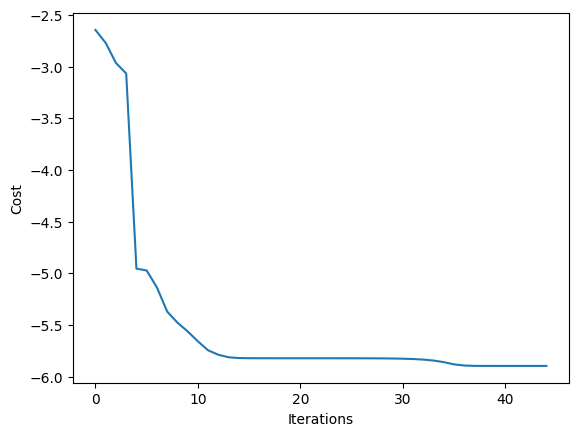

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict_vqe["iters"]), callback_dict_vqe["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
params_pqc = res.x
params_pqc

array([ 5.80344510e+00,  5.88570616e+00,  5.88570617e+00,  5.80344509e+00,
        7.85398307e+00, -1.26102966e-06,  7.85398051e+00,  1.46596586e-06,
        1.57079489e+00])

## Cost Function for VQNHE

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))

In [ ]:
# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  W1 = parameter[0:25]
  W2 = parameter[25:30]
  c = parameter[30]

  W1 = W1.reshape(5,5)
  W2 = W2.reshape(1,5)

  a1 = np.matmul(W1, x)
  z1 = relu(a1)

  a2 = np.matmul(W2, z1)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)

In [ ]:
def Z0Z1(params_nn, ansatz_zz, params_pqc, sampler):
  job = sampler.run(ansatz_zz, params_pqc).result()
  prob_string = job.quasi_dists[0]

  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn, ansatz_zz, params_pqc, sampler):
  job = sampler.run(ansatz_zz, params_pqc).result()
  prob_string = job.quasi_dists[0]

  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn, ansatz_zz, params_pqc, sampler):
  job = sampler.run(ansatz_zz, params_pqc).result()
  prob_string = job.quasi_dists[0]

  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn, ansatz_zz, params_pqc, sampler):
  job = sampler.run(ansatz_zz, params_pqc).result()
  prob_string = job.quasi_dists[0]

  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval

In [ ]:
def X0(params_nn, ansatz_x0, params_pqc, sampler):
  job = sampler.run(ansatz_x0, params_pqc).result()
  prob_string = job.quasi_dists[0]

  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn, ansatz_x1, params_pqc, sampler):
  job = sampler.run(ansatz_x1, params_pqc).result()
  prob_string = job.quasi_dists[0]

  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn, ansatz_x2, params_pqc, sampler):
  job = sampler.run(ansatz_x2, params_pqc).result()
  prob_string = job.quasi_dists[0]

  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn, ansatz_x3, params_pqc, sampler):
  job = sampler.run(ansatz_x3, params_pqc).result()
  prob_string = job.quasi_dists[0]

  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn, ansatz_x4, params_pqc, sampler):
  job = sampler.run(ansatz_x4, params_pqc).result()
  prob_string = job.quasi_dists[0]

  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval

In [ ]:
def norm(params_nn, ansatz_zz, params_pqc, sampler):
  job = sampler.run(ansatz_zz, params_pqc).result()
  prob_string = job.quasi_dists[0]

  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn, params_pqc, ansatz_zz, ansatz_x0, ansatz_x1, ansatz_x2, ansatz_x3, ansatz_x4, sampler):
  expval = 0
  expval = expval + Z0Z1(params_nn, ansatz_zz, params_pqc, sampler)
  expval = expval + Z1Z2(params_nn, ansatz_zz, params_pqc, sampler)
  expval = expval + Z2Z3(params_nn, ansatz_zz, params_pqc, sampler)
  expval = expval + Z3Z4(params_nn, ansatz_zz, params_pqc, sampler)

  expval = expval - X0(params_nn, ansatz_x0, params_pqc, sampler)
  expval = expval - X1(params_nn, ansatz_x1, params_pqc, sampler)
  expval = expval - X2(params_nn, ansatz_x2, params_pqc, sampler)
  expval = expval - X3(params_nn, ansatz_x3, params_pqc, sampler)
  expval = expval - X4(params_nn, ansatz_x4, params_pqc, sampler)

  expval = expval / norm(params_nn, ansatz_zz, params_pqc, sampler)

  return expval

In [ ]:
cost_func_vqnhe(np.zeros(shape=271), params_pqc, ansatz_zz, ansatz_x0, ansatz_x1, ansatz_x2, ansatz_x3, ansatz_x4, sampler)

-5.897229133327298

In [ ]:
def build_callback_vqnhe(params_pqc, ansatz_zz, ansatz_x0, ansatz_x1, ansatz_x2, ansatz_x3, ansatz_x4, sampler, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector, params_pqc, ansatz_zz, ansatz_x0, ansatz_x1, ansatz_x2, ansatz_x3, ansatz_x4, sampler)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Cost Function for VQNHE which suitable in calling probability a lot

In [ ]:
@cache
def pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8):

  def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8000, seed=1).result()
    return cost.values[0]


  def build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict):
    def callback(current_vector):
      callback_dict_vqe["iters"] += 1
      callback_dict_vqe["prev_vector"] = current_vector
      current_cost_vqe = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

      callback_dict_vqe["cost_history"].append(current_cost_vqe)

      print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict_vqe["iters"], current_cost_vqe),
        end="\r",
        flush=True,
      )

    return callback


  x_pqc_0 = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])

  callback_dict_vqe = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  options = dict()
  options["maxiter"] = 50000
  options["disp"] = True

  callback_vqe = build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict_vqe)
  res = minimize(
    cost_func_vqe,
    x_pqc_0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback_vqe,
    options=options
  )

  params_pqc = res.x

  return params_pqc

In [ ]:
@cache
def prob_string_zz(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_zz, params_pqc, shots=8000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x0(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x0, params_pqc, shots=8000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x1(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x1, params_pqc, shots=8000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x2(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x2, params_pqc, shots=8000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x3(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x3, params_pqc, shots=8000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x4(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x4, params_pqc, shots=8000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

In [ ]:
def Z0Z1(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval

In [ ]:
def X0(params_nn, x_pqc_0):
  prob_string = prob_string_x0(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn, x_pqc_0):
  prob_string = prob_string_x1(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn, x_pqc_0):
  prob_string = prob_string_x2(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn, x_pqc_0):
  prob_string = prob_string_x3(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn, x_pqc_0):
  prob_string = prob_string_x4(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval

In [ ]:
def norm(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn, x_pqc_0):
  expval = 0
  expval = expval + Z0Z1(params_nn, x_pqc_0)
  expval = expval + Z1Z2(params_nn, x_pqc_0)
  expval = expval + Z2Z3(params_nn, x_pqc_0)
  expval = expval + Z3Z4(params_nn, x_pqc_0)

  expval = expval - X0(params_nn, x_pqc_0)
  expval = expval - X1(params_nn, x_pqc_0)
  expval = expval - X2(params_nn, x_pqc_0)
  expval = expval - X3(params_nn, x_pqc_0)
  expval = expval - X4(params_nn, x_pqc_0)

  expval = expval / norm(params_nn, x_pqc_0)

  return expval

In [ ]:
def build_callback_vqnhe(x_pqc_0, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector, x_pqc_0)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## 2nd Step : Opmitizing Parameters in NN

In [ ]:
@cache
def pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8):

  def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result()
    return cost.values[0]


  def build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict):
    def callback(current_vector):
      callback_dict_vqe["iters"] += 1
      callback_dict_vqe["prev_vector"] = current_vector
      current_cost_vqe = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

      callback_dict_vqe["cost_history"].append(current_cost_vqe)

      print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict_vqe["iters"], current_cost_vqe),
        end="\r",
        flush=True,
      )

    return callback


  x_pqc_0 = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])

  callback_dict_vqe = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  options = dict()
  options["maxiter"] = 50000
  options["disp"] = True

  callback_vqe = build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict_vqe)
  res = minimize(
    cost_func_vqe,
    x_pqc_0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback_vqe,
    options=options
  )

  params_pqc = res.x

  return params_pqc

In [ ]:
@cache
def prob_string_zz(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_zz, params_pqc, shots=8000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x0(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x0, params_pqc, shots=8000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x1(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x1, params_pqc, shots=8000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x2(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x2, params_pqc, shots=8000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x3(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x3, params_pqc, shots=8000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x4(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x4, params_pqc, shots=8000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

In [ ]:
def Z0Z1(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval

In [ ]:
def X0(params_nn, x_pqc_0):
  prob_string = prob_string_x0(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn, x_pqc_0):
  prob_string = prob_string_x1(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn, x_pqc_0):
  prob_string = prob_string_x2(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn, x_pqc_0):
  prob_string = prob_string_x3(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn, x_pqc_0):
  prob_string = prob_string_x4(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval

In [ ]:
def norm(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn, x_pqc_0):
  expval = 0
  expval = expval + Z0Z1(params_nn, x_pqc_0)
  expval = expval + Z1Z2(params_nn, x_pqc_0)
  expval = expval + Z2Z3(params_nn, x_pqc_0)
  expval = expval + Z3Z4(params_nn, x_pqc_0)

  expval = expval - X0(params_nn, x_pqc_0)
  expval = expval - X1(params_nn, x_pqc_0)
  expval = expval - X2(params_nn, x_pqc_0)
  expval = expval - X3(params_nn, x_pqc_0)
  expval = expval - X4(params_nn, x_pqc_0)

  expval = expval / norm(params_nn, x_pqc_0)

  return expval

In [ ]:
def build_callback_vqnhe(x_pqc_0, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector, x_pqc_0)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Repeat Optimizing Parameters in NN for 100 times

np.random.seed(k)

k 0~100

In [ ]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x_pqc_0 = 2*np.pi*np.random.random(9)

  np.random.seed(k)
  x0 = 2 * np.random.random(271) - 1

  callback = build_callback_vqnhe(x_pqc_0, callback_dict)

  options = dict()
  options["maxiter"] = 250
  options["disp"] = True

  res = minimize(
    cost_func_vqnhe,
    x0,
    args=(x_pqc_0),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

Optimization terminated successfully.
         Current function value: -6.026674
         Iterations: 162
         Function evaluations: 47872
         Gradient evaluations: 176
Optimization terminated successfully.
         Current function value: -6.026674
         Iterations: 117
         Function evaluations: 34816
         Gradient evaluations: 128


In [ ]:
local_minimum_list

## Optimized Parameters

In [ ]:
# PQC optimized parameter

op_param_pqc = np.array([ 5.80341424e+00,  5.88567382e+00,  6.68073582e+00,  5.80344341e+00,
        4.71452869e+00,  3.13939431e+00,  7.85619779e+00, -2.12129562e-03,
        1.57296580e+00])

In [ ]:
## NN optimized parameter

op_param_nn = np.array([-9.50863418e-01,  7.79899725e-02,  7.02867952e-01, -3.80272172e-01,
        5.11024646e-01,  6.96638808e-01,  4.51210989e-02,  8.12588463e-01,
        1.13930864e+00, -6.13227232e-01, -1.08269609e+00, -1.78306348e-02,
       -6.93574331e-01,  9.19452683e-01, -4.99815510e-02,  2.87460393e-01,
       -1.06066202e-01,  4.63964331e-01,  1.24180842e+00, -1.51679910e-01,
       -6.65075105e-01, -2.58720554e-01,  1.69291662e-01, -2.53742942e-01,
        8.40616898e-01,  5.09111139e-01, -9.78605967e-01, -5.77680911e-01,
       -1.34731565e-01, -3.67089431e-01, -6.12570856e-02, -1.13443771e+00,
        7.39235205e-01, -9.51609223e-01,  1.17646017e+00, -4.18339877e-01,
       -5.27549064e-01, -6.30168944e-01, -7.25566274e-01, -3.38109749e-02,
        3.83165832e-01,  3.98686355e-01, -3.30950011e-01,  6.22848238e-01,
        8.72745546e-01,  4.95830155e-02, -1.03719679e+00, -2.81955843e-02,
        6.84570089e-01, -3.15427858e-02,  4.22869802e-01,  4.24296044e-01,
       -6.79560186e-01, -9.66055715e-01,  7.13048994e-01,  9.89449508e-02,
       -8.48276992e-01,  7.68851429e-02, -4.65130766e-01,  9.50302066e-01,
       -4.47868079e-01,  3.09240643e-01, -5.54879154e-01, -7.48112364e-01,
       -2.00352151e-01,  8.48279217e-01,  8.95436722e-01, -7.54519892e-01,
       -5.28986325e-01, -7.82572163e-01,  8.58328349e-01, -1.54703335e-05,
        7.92772622e-01, -7.22647903e-01,  5.98417470e-01,  2.30410600e-01,
       -4.19852716e-01, -6.15438268e-01, -5.35937102e-01,  5.63728140e-01,
        1.06910000e+00,  4.32223252e-01,  4.36750285e-01, -2.42659053e-01,
        5.54929234e-01, -1.83404471e-01, -9.29453198e-01,  4.54104639e-01,
        6.69319928e-01,  7.78969603e-01,  5.59939300e-01, -4.05705118e-01,
        8.77711063e-01,  5.32954478e-01,  5.95477008e-01,  7.17154062e-02,
        5.10122896e-01,  5.06823222e-01,  7.03178023e-01, -9.27906999e-01,
        1.40394127e-01,  1.22723350e-01, -7.45160943e-01,  3.69852345e-01,
        3.42172871e-01, -9.84678454e-01,  5.94127254e-01,  3.20386844e-01,
        5.41645420e-02,  8.70211943e-01, -6.71195082e-01, -5.53326239e-01,
        1.18936744e-01,  5.63323810e-01, -6.24957849e-01, -7.63576021e-01,
        4.24761949e-01,  6.15626056e-01, -3.15753556e-01,  5.75881527e-01,
       -6.46726698e-01, -1.28564748e-01, -9.21912507e-03,  3.65905484e-01,
       -2.70241943e-01, -5.52058061e-02, -6.82171976e-01,  5.32724649e-01,
        3.26820886e-01, -7.77046509e-01,  4.57963278e-03, -3.10402002e-01,
       -9.11419249e-01,  9.16800222e-01,  6.47144634e-01, -5.59157923e-01,
        3.11623118e-01,  6.13013573e-01,  2.19743975e-01, -6.05045376e-01,
       -2.06098130e-01, -5.13317082e-01,  4.63090393e-01, -1.06187329e-01,
       -6.84688459e-01,  2.01475494e-01, -7.13724709e-01, -8.13111021e-01,
       -6.91510955e-02, -9.30067977e-01, -3.69628866e-01, -1.10039241e+00,
        9.28783570e-01, -2.30521165e-01, -1.80420289e-01,  5.50513159e-01,
       -3.28701044e-01,  2.35453330e-01, -2.76823929e-01,  7.45054543e-01,
       -5.99916833e-01, -3.54484601e-02, -1.07605307e+00, -8.01590937e-01,
        7.69790432e-01,  1.50487494e-01,  7.66773370e-01, -8.93707926e-01,
        6.03694482e-01,  1.17136151e+00,  4.53894181e-01, -5.16147254e-01,
        7.72323326e-03,  1.73774884e-02, -4.30934568e-01, -4.73110300e-01,
        5.24816130e-01,  4.05911801e-01,  9.94246862e-01,  4.62809998e-01,
        5.70880906e-01,  1.83439597e-01,  2.00148591e-01,  4.32406676e-02,
        5.90182635e-01, -3.01872334e-01,  1.06178150e-01,  4.62526499e-01,
        9.19707933e-01, -8.81140568e-01, -2.27855922e-01, -4.16126646e-02,
        7.41585509e-01, -1.05824121e-01,  4.40811415e-01,  4.67507991e-01,
       -6.21755122e-01, -6.43873622e-01, -8.85404313e-01, -2.31809982e-01,
        3.76419272e-01,  1.17980125e+00, -6.46096339e-01,  4.26504446e-01,
       -5.15365965e-01, -3.98079399e-01, -8.22055965e-01,  5.48256798e-01,
       -1.00153407e+00,  2.33361567e-01, -3.36232546e-01, -3.50264939e-01,
        5.18297906e-01, -4.23255748e-01, -2.91565344e-01, -7.31561755e-01,
        7.82543157e-01,  7.01572051e-01, -7.75347400e-01, -6.52571893e-01,
        8.93928642e-01,  4.20246597e-01, -9.31170403e-01,  9.32940405e-01,
        3.98392056e-01, -5.31733748e-01,  6.22166404e-01,  3.35952671e-01,
        4.16558759e-01,  1.64916037e-01,  3.98307508e-01,  6.11039296e-01,
       -5.81646127e-01, -2.26213849e-01, -3.00975001e-01, -4.29164182e-02,
       -7.88401196e-01,  3.01166637e-01, -3.61816186e-02,  4.54298386e-02,
       -6.94878357e-01,  4.92329270e-01,  3.20231571e-01,  9.06044122e-01,
       -1.15154467e-01,  2.27320222e-01,  5.68498326e-02, -5.91776573e-01,
        3.11942934e-02, -1.05724555e-01, -6.64980827e-02, -4.88243939e-01,
       -8.43452938e-01, -9.96272558e-01,  8.06327092e-01, -1.29704783e-02,
        8.26845917e-01, -6.94828230e-01,  9.32283300e-01,  4.63014694e-01,
       -8.88308636e-02, -5.83843452e-01, -5.90892523e-01,  2.15623443e-01,
       -8.72070354e-01, -4.51780543e-01,  5.66587858e-02, -4.15828103e-01,
        5.92836732e-01,  5.77877275e-01,  5.07768655e-01])

## Plot Result of VQNHE in Noiseless Simulator

VQNHE Lowest Energy Configuration for 100 times

[-6.02667373, -6.02667373, -6.02667368, -6.02667354, -5.8987224 , -5.97700928, -5.96536259, -6.02667368, -6.02667371, -5.94009695, -6.02667371, -6.02628084, -6.02667371, -5.89945393, -6.02667371, -5.95833590, -6.02667352, -6.02667373, -6.02667368, -5.9294343, -5.94016942, -6.0266737 , -6.02667358, -6.02667369, -5.97782861, -6.0266737 , -6.02667319, -5.97782869, -5.97782861, -5.97782857, -6.02667363, -6.02667367, -5.94801533, -5.97500441, -6.02667365, -6.02667369, -6.02659477, -6.01371031, -5.97701072, -5.89828085, -5.94063178, -5.94017144, -6.0266737 , -5.96536198, -6.02667369, -6.02642066, -6.02262504, -5.98140869, -6.02609303, -6.02667364, -5.947205, -6.022831, -6.026674, -6.026101, -5.969770, -6.025860, -6.02667367, -6.02113763, -6.0266737 , -6.0266737, -6.02667366, -6.02667368, -5.97976822, -5.89828149, -6.02158803, -6.02667372, -6.02034773, -6.02288384, -6.02152311, -6.02667373, -5.98259114, -6.02667355, -6.02667366, -6.02627895, -6.0262785, -5.94066224, -5.98265633, -6.02511394, -6.0266737 , -5.97075392, -5.91197141, -5.94014176, -5.96949375, -6.02667369, -6.02628083, -6.02628084, -5.93776153, -5.94066823,-5.9406369 , -6.02245133, -6.02667364, -6.02667368, -6.02667371, -6.02585885, -6.02667363, 6.02667372, -5.96536257, -5.93741276, -6.02667351, -6.02667368]

VQE Lowest Energy Configuration for 100 times

[-5.82879886, -5.89649831, -5.89460313, -5.87216999, -5.89714665, -5.8970116,
-5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631, -5.89706667, -5.89640049, -5.89686096, -5.84344741, -5.89722894, -5.89514208, -5.89722285, -5.89281514, -5.8954058 , -5.89660128, -5.89722463, -5.8262015 , -5.89560605, -5.83363386, -5.87957003, -5.82656423, -5.89196626, -5.82341307, -5.8972198 ,
-5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954, -5.89066143, -5.89556185, -5.8294686 , -5.89500158, -5.88381387, -5.89720651, -5.86661138, -5.89703354, -5.8971071 , -5.89488588, -5.88977925, -5.89321505, -5.89655454, -5.89722776, -5.89703659, -5.8961525 , -5.89248345, -5.89678098, -5.89358845, -5.82619791, -5.88964449, -5.89599961, -5.89636862, -5.87624267, -5.89717557, -5.89514411, -5.83231881, -5.89722489, -5.89417956, -5.86522879, -5.89603463, -5.82299708, -5.89690459, -5.89513546, -5.88945447, -5.89701515, -5.89144585, -5.89279627, -5.89577581, -5.836521  , -5.88388422, -5.89711739, -5.84467668, -5.89351984, -5.89512836, -5.89677164, -5.87800257, -5.88000114, -5.83970428, -5.88410124, -5.86785946, -5.8962536 , -5.89717338, -5.84988649, -5.892418  , -5.88143104, -5.89473968, -5.89702307, -5.85915542, -5.89705331, -5.89717653, -5.89196071, -5.89641764, -5.88954192, -5.89643247]

In [ ]:
vqnhe_minimum_list = np.array([-6.02667373, -6.02667373, -6.02667368, -6.02667354, -5.8987224 , -5.97700928,
                                -5.96536259, -6.02667368, -6.02667371, -5.94009695, -6.02667371, -6.02628084,
                                -6.02667371, -5.89945393, -6.02667371, -5.95833590, -6.02667352, -6.02667373,
                                -6.02667368, -5.9294343, -5.94016942, -6.0266737 , -6.02667358, -6.02667369,
                                -5.97782861, -6.0266737 , -6.02667319, -5.97782869, -5.97782861, -5.97782857,
                                -6.02667363, -6.02667367, -5.94801533, -5.97500441, -6.02667365, -6.02667369,
                                -6.02659477, -6.01371031, -5.97701072, -5.89828085, -5.94063178, -5.94017144,
                                -6.0266737 , -5.96536198, -6.02667369, -6.02642066, -6.02262504, -5.98140869,
                                -6.02609303, -6.02667364, -5.947205, -6.022831, -6.026674, -6.026101,
                                -5.969770, -6.025860, -6.02667367, -6.02113763, -6.0266737 , -6.0266737,
                                -6.02667366, -6.02667368, -5.97976822, -5.89828149, -6.02158803, -6.02667372,
                                -6.02034773, -6.02288384, -6.02152311, -6.02667373, -5.98259114, -6.02667355,
                                -6.02667366, -6.02627895, -6.0262785, -5.94066224, -5.98265633, -6.02511394,
                                -6.0266737 , -5.97075392, -5.91197141, -5.94014176, -5.96949375, -6.02667369,
                                -6.02628083, -6.02628084, -5.93776153, -5.94066823,-5.9406369 , -6.02245133,
                                -6.02667364, -6.02667368, -6.02667371, -6.02585885, -6.02667363, -6.02667372,
                                -5.96536257, -5.93741276, -6.02667351, -6.02667368])

In [ ]:
vqe_minimum_list = np.array([-5.82879886, -5.89649831, -5.89460313, -5.87216999, -5.89714665, -5.8970116,
-5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631, -5.89706667,
-5.89640049, -5.89686096, -5.84344741, -5.89722894, -5.89514208, -5.89722285,
-5.89281514, -5.8954058 , -5.89660128, -5.89722463, -5.8262015 , -5.89560605,
-5.83363386, -5.87957003, -5.82656423, -5.89196626, -5.82341307, -5.8972198 ,
-5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954, -5.89066143,
-5.89556185, -5.8294686 , -5.89500158, -5.88381387, -5.89720651, -5.86661138,
-5.89703354, -5.8971071 , -5.89488588, -5.88977925, -5.89321505, -5.89655454,
-5.89722776, -5.89703659, -5.8961525 , -5.89248345, -5.89678098, -5.89358845,
-5.82619791, -5.88964449, -5.89599961, -5.89636862, -5.87624267, -5.89717557,
-5.89514411, -5.83231881, -5.89722489, -5.89417956, -5.86522879, -5.89603463,
-5.82299708, -5.89690459, -5.89513546, -5.88945447, -5.89701515, -5.89144585,
-5.89279627, -5.89577581, -5.836521  , -5.88388422, -5.89711739, -5.84467668,
-5.89351984, -5.89512836, -5.89677164, -5.87800257, -5.88000114, -5.83970428,
-5.88410124, -5.86785946, -5.8962536 , -5.89717338, -5.84988649, -5.892418  ,
-5.88143104, -5.89473968, -5.89702307, -5.85915542, -5.89705331, -5.89717653,
-5.89196071, -5.89641764, -5.88954192, -5.89643247])

In [ ]:
mean_vqnhe = np.mean(vqnhe_minimum_list)
var_vqnhe = np.var(vqnhe_minimum_list)
max_vqnhe = np.max(vqnhe_minimum_list)
min_vqnhe = np.min(vqnhe_minimum_list)

print("mean : {0}".format(mean_vqnhe))
print("variance : {0}".format(var_vqnhe))
print("maximum : {0}".format(max_vqnhe))
print("minimum : {0}".format(min_vqnhe))
print()
print(vqnhe_minimum_list)

mean : -5.999104296200001
variance : 0.0015127281232598648
maximum : -5.89828085
minimum : -6.026674

[-6.02667373 -6.02667373 -6.02667368 -6.02667354 -5.8987224  -5.97700928
 -5.96536259 -6.02667368 -6.02667371 -5.94009695 -6.02667371 -6.02628084
 -6.02667371 -5.89945393 -6.02667371 -5.9583359  -6.02667352 -6.02667373
 -6.02667368 -5.9294343  -5.94016942 -6.0266737  -6.02667358 -6.02667369
 -5.97782861 -6.0266737  -6.02667319 -5.97782869 -5.97782861 -5.97782857
 -6.02667363 -6.02667367 -5.94801533 -5.97500441 -6.02667365 -6.02667369
 -6.02659477 -6.01371031 -5.97701072 -5.89828085 -5.94063178 -5.94017144
 -6.0266737  -5.96536198 -6.02667369 -6.02642066 -6.02262504 -5.98140869
 -6.02609303 -6.02667364 -5.947205   -6.022831   -6.026674   -6.026101
 -5.96977    -6.02586    -6.02667367 -6.02113763 -6.0266737  -6.0266737
 -6.02667366 -6.02667368 -5.97976822 -5.89828149 -6.02158803 -6.02667372
 -6.02034773 -6.02288384 -6.02152311 -6.02667373 -5.98259114 -6.02667355
 -6.02667366 -6.02627895 

In [ ]:
mean_vqe = np.mean(vqe_minimum_list)
var_vqe = np.var(vqe_minimum_list)
max_vqe = np.max(vqe_minimum_list)
min_vqe = np.min(vqe_minimum_list)

print("mean : {0}".format(mean_vqe))
print("variance : {0}".format(var_vqe))
print("maximum : {0}".format(max_vqe))
print("minimum : {0}".format(min_vqe))
print()
print(vqe_minimum_list)

mean : -5.8822224289000005
variance : 0.0005472796114355233
maximum : -5.82299708
minimum : -5.89722894

[-5.82879886 -5.89649831 -5.89460313 -5.87216999 -5.89714665 -5.8970116
 -5.82318112 -5.88723766 -5.87906279 -5.89633351 -5.89712631 -5.89706667
 -5.89640049 -5.89686096 -5.84344741 -5.89722894 -5.89514208 -5.89722285
 -5.89281514 -5.8954058  -5.89660128 -5.89722463 -5.8262015  -5.89560605
 -5.83363386 -5.87957003 -5.82656423 -5.89196626 -5.82341307 -5.8972198
 -5.82579769 -5.89274968 -5.89058962 -5.89571965 -5.89121954 -5.89066143
 -5.89556185 -5.8294686  -5.89500158 -5.88381387 -5.89720651 -5.86661138
 -5.89703354 -5.8971071  -5.89488588 -5.88977925 -5.89321505 -5.89655454
 -5.89722776 -5.89703659 -5.8961525  -5.89248345 -5.89678098 -5.89358845
 -5.82619791 -5.88964449 -5.89599961 -5.89636862 -5.87624267 -5.89717557
 -5.89514411 -5.83231881 -5.89722489 -5.89417956 -5.86522879 -5.89603463
 -5.82299708 -5.89690459 -5.89513546 -5.88945447 -5.89701515 -5.89144585
 -5.89279627 -5.89577

# VQE, VQNHE Data & Figure

In [ ]:
import numpy as np

vqe_noiseless = np.array([-5.82879886, -5.89649831, -5.89460313, -5.87216999, -5.89714665, -5.8970116, -5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631, -5.89706667, -5.89640049, -5.89686096, -5.84344741, -5.89722894, -5.89514208, -5.89722285, -5.89281514, -5.8954058 , -5.89660128, -5.89722463, -5.8262015 , -5.89560605, -5.83363386, -5.87957003, -5.82656423, -5.89196626, -5.82341307, -5.8972198 , -5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954, -5.89066143, -5.89556185, -5.8294686 , -5.89500158, -5.88381387, -5.89720651, -5.86661138, -5.89703354, -5.8971071 , -5.89488588, -5.88977925, -5.89321505, -5.89655454, -5.89722776, -5.89703659, -5.8961525 , -5.89248345, -5.89678098, -5.89358845, -5.82619791, -5.88964449, -5.89599961, -5.89636862, -5.87624267, -5.89717557, -5.89514411, -5.83231881, -5.89722489, -5.89417956, -5.86522879, -5.89603463, -5.82299708, -5.89690459, -5.89513546, -5.88945447, -5.89701515, -5.89144585, -5.89279627, -5.89577581, -5.836521 , -5.88388422, -5.89711739, -5.84467668, -5.89351984, -5.89512836, -5.89677164, -5.87800257, -5.88000114, -5.83970428, -5.88410124, -5.86785946, -5.8962536 , -5.89717338, -5.84988649, -5.892418 , -5.88143104, -5.89473968, -5.89702307, -5.85915542, -5.89705331, -5.89717653, -5.89196071, -5.89641764, -5.88954192, -5.89643247])

vqe_bitflip_1 = np.array([-5.606, -5.71875, -5.60175, -5.698, -5.78125, -5.767, -5.5845, -5.645, -5.69425, -5.51475, -5.56775, -5.75575, -5.769, -5.57125, -5.64275, -5.74275, -5.5175, -5.7255, -5.666, -5.73625, -5.723, -5.7545, -5.6705, -5.60075, -5.52975, -5.6935, -5.61425, -5.6985, -5.69325, -5.6845, -5.73225, -5.72175, -5.6815, -5.31325, -5.7015, -5.70625, -5.68925, -5.738, -5.71325, -5.672, -5.66375, -5.618, -5.6725, -5.6015, -5.615, -5.7535, -5.52925, -5.767, -5.736, -5.7325, -5.647, -5.6445, -5.72275, -5.55, -5.67225, -5.68075, -5.7195, -5.6425, -5.7215, -5.60475, -5.72025, -5.709, -5.58275, -5.7115, -5.7125, -5.6935, -5.6955, -5.53825, -5.53225, -5.52125, -5.64025, -5.644, -5.7355, -5.6575, -5.6785, -5.56625, -5.762, -5.6985, -5.697, -5.63975, -5.61525, -5.68075, -5.76425, -5.7605, -5.699, -5.57325, -5.707, -5.57125, -5.74275, -5.68675, -5.4285, -5.7675, -5.76325, -5.6595, -5.71025, -5.66375, -5.6435, -5.726, -5.67075, -5.62425])

vqe_depolarization_1 = np.array([-5.464, -5.5505, -5.50125, -5.64825, -5.70225, -5.70025, -5.43825, -5.57275, -5.4745, -5.6055, -5.66075, -5.692, -5.68175, -5.47775, -5.317, -5.67375, -5.529, -5.657, -5.55025, -5.46625, -5.69025, -5.67975, -5.631, -5.4515, -5.412, -5.6265, -5.53575, -5.43025, -5.5855, -5.4955, -5.6855, -5.6505, -5.672, -5.35175, -5.65225, -5.65475, -5.4135, -5.56525, -5.438, -5.6115, -5.5225, -5.52325, -5.55525, -5.501, -5.3635, -5.70075, -5.649, -5.7025, -5.4855, -5.625, -5.6135, -5.633, -5.43725, -5.46675, -5.6255, -5.704, -5.432, -5.55775, -5.686, -5.511, -5.4655, -5.68625, -5.5895, -5.5275, -5.5875, -5.432, -5.30525, -5.475, -5.6845, -5.6685, -5.56775, -5.686, -5.502, -5.615, -5.6445, -5.5425, -5.67275, -5.57275, -5.614, -5.57625, -5.68275, -5.572, -5.68975, -5.66025, -5.5175, -5.597, -5.653, -5.49375, -5.71, -5.3725, -5.61425, -5.67175, -5.671, -5.55375, -5.63675, -5.5605, -5.66775, -5.65575, -5.62475, -5.5515 ])

vqe_cusco_0 = np.array([-5.06079102, -5.26391602, -5.17651367, -5.2253418 , -5.31274414, -5.31054688, -5.2878418 , -5.27050781, -5.28540039, -5.29614258])

vqe_cusco_1 = np.array([-5.72749676, -5.72937777, -5.73962453, -5.7612482 , -5.68476149, -5.6843978 , -5.64541463, -5.76621523, -5.71810848, -5.76632458])

vqe_cusco_2 = np.array([-5.69306641, -5.74666425, -5.69708356, -5.7189238 , -5.70712288, -5.67600891, -5.72470249, -5.74243537, -5.69886404, -5.62487282])

vqe_cusco_3 = np.array([-6.22839352, -4.62640797, -6.19686491, -5.54156607, -5.65017652, -5.74497337, -6.03524048, -5.48405816, -5.61264108, -6.14861837])


print("vqe_noiseless")
print("mean : {0}".format(np.mean(vqe_noiseless)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_noiseless))))
print("maximum : {0}".format(np.max(vqe_noiseless)))
print("minimum : {0}".format(np.min(vqe_noiseless)))
print()
print()


print("vqe_bitflip_1")
print("mean : {0}".format(np.mean(vqe_bitflip_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_bitflip_1))))
print("maximum : {0}".format(np.max(vqe_bitflip_1)))
print("minimum : {0}".format(np.min(vqe_bitflip_1)))
print()
print()


print("vqe_depolarization_1")
print("mean : {0}".format(np.mean(vqe_depolarization_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_depolarization_1))))
print("maximum : {0}".format(np.max(vqe_depolarization_1)))
print("minimum : {0}".format(np.min(vqe_depolarization_1)))
print()
print()


print("vqe_cusco_0")
print("mean : {0}".format(np.mean(vqe_cusco_0)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_cusco_0))))
print("maximum : {0}".format(np.max(vqe_cusco_0)))
print("minimum : {0}".format(np.min(vqe_cusco_0)))
print()
print()


print("vqe_cusco_1")
print("mean : {0}".format(np.mean(vqe_cusco_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_cusco_1))))
print("maximum : {0}".format(np.max(vqe_cusco_1)))
print("minimum : {0}".format(np.min(vqe_cusco_1)))
print()
print()


print("vqe_cusco_2")
print("mean : {0}".format(np.mean(vqe_cusco_2)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_cusco_2))))
print("maximum : {0}".format(np.max(vqe_cusco_2)))
print("minimum : {0}".format(np.min(vqe_cusco_2)))
print()
print()


print("vqe_cusco_3")
print("mean : {0}".format(np.mean(vqe_cusco_3)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_cusco_3))))
print("maximum : {0}".format(np.max(vqe_cusco_3)))
print("minimum : {0}".format(np.min(vqe_cusco_3)))
print()
print()

vqe_noiseless
mean : -5.8822224289000005
stdev : 0.023394008024182674
maximum : -5.82299708
minimum : -5.89722894


vqe_bitflip_1
mean : -5.665257499999999
stdev : 0.07990144284523278
maximum : -5.31325
minimum : -5.78125


vqe_depolarization_1
mean : -5.5746225
stdev : 0.09975300430939411
maximum : -5.30525
minimum : -5.71


vqe_cusco_0
mean : -5.2489746109999995
stdev : 0.07404667190690961
maximum : -5.06079102
minimum : -5.31274414


vqe_cusco_1
mean : -5.722296947
stdev : 0.038125528455826035
maximum : -5.64541463
minimum : -5.76632458


vqe_cusco_2
mean : -5.702974453000001
stdev : 0.0334461269186218
maximum : -5.62487282
minimum : -5.74666425


vqe_cusco_3
mean : -5.726894045
stdev : 0.45485764530500655
maximum : -4.62640797
minimum : -6.22839352




In [ ]:
import numpy as np

vqnhe_noiseless = np.array([-6.02667373, -6.02667373, -6.02667368, -6.02667354, -5.8987224, -5.97700928, -5.96536259, -6.02667368, -6.02667371, -5.94009695, -6.02667371, -6.02628084, -6.02667371, -5.89945393, -6.02667371, -5.95833590, -6.02667352, -6.02667373, -6.02667368, -5.9294343, -5.94016942, -6.0266737 , -6.02667358, -6.02667369, -5.97782861, -6.0266737 , -6.02667319, -5.97782869, -5.97782861, -5.97782857, -6.02667363, -6.02667367, -5.94801533, -5.97500441, -6.02667365, -6.02667369, -6.02659477, -6.01371031, -5.97701072, -5.89828085, -5.94063178, -5.94017144, -6.0266737, -5.96536198, -6.02667369, -6.02642066, -6.02262504, -5.98140869, -6.02609303, -6.02667364, -5.947205, -6.022831, -6.026674, -6.026101, -5.969770, -6.025860, -6.02667367, -6.02113763, -6.0266737 , -6.0266737, -6.02667366, -6.02667368, -5.97976822, -5.89828149, -6.02158803, -6.02667372, -6.02034773, -6.02288384, -6.02152311, -6.02667373, -5.98259114, -6.02667355, -6.02667366, -6.02627895, -6.0262785, -5.94066224, -5.98265633, -6.02511394, -6.0266737 , -5.97075392, -5.91197141, -5.94014176, -5.96949375, -6.02667369, -6.02628083, -6.02628084, -5.93776153, -5.94066823, -5.9406369, -6.02245133, -6.02667364, -6.02667368, -6.02667371, -6.02585885, -6.02667363, -6.02667372, -5.96536257, -5.93741276, -6.02667351, -6.02667368])

vqnhe_bitflip_1 = np.array([-5.8392458 , -5.87546176, -5.83924655, -5.8402692 , -5.94158523, -5.8751673 , -5.94158524, -5.94158525, -5.94158523, -5.78074357, -5.94158524, -5.94158525, -5.94158524, -5.77757292, -5.94145631, -5.93439034, -5.91385498, -5.94158136, -5.94158525, -5.77810274, -5.780743, -5.941585, -5.941585, -5.941585, -5.941503, -5.94158525, -5.78074364, -5.87516718, -5.88974625, -5.94158525, -5.9415852 , -5.93299599, -5.94158524, -5.90888822, -5.9316028 , -5.94158525, -5.9380279 , -5.80099864, -5.7535819 , -5.77514423, -5.90469022, -5.94158524, -5.94158523, -5.94158525, -5.83924657, -5.94158524, -5.93917358, -5.94154199, -5.84026916, -5.77825212, -5.93705511, -5.78074338, -5.94156212, -5.94158525, -5.93272868, -5.94158525, -5.94158525, -5.86214847, -5.941585 , -5.77816882, -5.81901766, -5.94148885, -5.82826786, -5.83924583, -5.77273822, -5.94158524, -5.84258761, -5.94158525, -5.9415604 , -5.93799288, -5.9415426 , -5.94158525, -5.94158525, -5.94158525, -5.931018 , -5.94158525, -5.78074152, -5.78067298, -5.94148651, -5.94158508, -5.7362738 , -5.91543312, -5.9085967 , -5.94137327, -5.94158525, -5.94158525, -5.78046066, -5.77821064, -5.94158511, -5.93933252, -5.78074348, -5.94158525, -5.94158525, -5.94158523, -5.94158523, -5.94158525, -5.87817228, -5.94137875, -5.79777723, -5.94155634])

vqnhe_depolarization_1 = np.array([-5.9053623802295565, -5.905284848147373, -5.905211478978276, -5.895858287602114, -5.9053670725564595, -5.8043448004934834, -5.804216265436067, -5.9053671677560144, -5.752514185468417, -5.897287131337429, -5.90536716339884, -5.905367166698549, -5.905367169860917, -5.905366212511115, -5.904065368082751, -5.903511757937208, -5.902001867053614, -5.90536713629146, -5.905367170062944, -5.696496721765803, -5.752514690831475, -5.897556454107229, -5.905367157774968, -5.905367169035556, -5.835788569713097, -5.905367168407769, -5.892477704240274, -5.905366768357541, -5.713177433384576, -5.855618175239319, -5.905367132178551, -5.902231709331003, -5.897446083779941, -5.752514879860089, -5.89728312783902, -5.905367170026302, -5.751604752708811, -5.866904315858801, -5.897398650176224, -5.905367160053486, -5.905367141533028, -5.905367136958099, -5.897443379760443, -5.718947929766712, -5.801289565304456, -5.905359403128855, -5.896698642251029, -5.905367030164439, -5.905278886377779, -5.6827271876812695, -5.734734249353867, -5.9053623802295565, -5.905284848147373, -5.905211478978276, -5.895858287602114, -5.9053670725564595, -5.8043448004934834, -5.804216265436067, -5.9053671677560144, -5.752514185468417, -5.897287131337429, -5.90536716339884, -5.905367166698549, -5.905367169860917, -5.905366212511115, -5.904065368082751, -5.903511757937208, -5.902001867053614, -5.90536713629146, -5.905367170062944, -5.696496721765803, -5.752514690831475, -5.897556454107229, -5.905367157774968, -5.905367169035556, -5.835788569713097, -5.905367168407769, -5.892477704240274, -5.905366768357541, -5.713177433384576, -5.855618175239319, -5.905367132178551, -5.902231709331003, -5.897446083779941, -5.752514879860089, -5.89728312783902, -5.905367170026302, -5.751604752708811, -5.866904315858801, -5.897398650176224, -5.905367160053486, -5.905367141533028, -5.905367136958099, -5.897285675121541, -5.90528534171424, -5.89742821, -5.80434494, -5.70794607, -5.72243123, -5.90536717])

vqnhe_cusco_0 = np.array([-5.77848119, -5.77848119, -5.71289339, -5.77848119, -5.77848119, -5.77848119, -5.77848119, -5.77848119, -5.77848119, -5.77848119])

vqnhe_cusco_1 = np.array([-6.20387731, -6.19907682, -6.20387731, -6.19474288, -5.90438281, -5.90005932, -6.20387731, -6.20387731, -6.20387731, -5.75011618])


print("vqnhe_noiseless")
print("mean : {0}".format(np.mean(vqnhe_noiseless)))
print("stdev : {0}".format(np.sqrt(np.var(vqnhe_noiseless))))
print("maximum : {0}".format(np.max(vqnhe_noiseless)))
print("minimum : {0}".format(np.min(vqnhe_noiseless)))
print()
print()


print("vqnhe_bitflip_1")
print("mean : {0}".format(np.mean(vqnhe_bitflip_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqnhe_bitflip_1))))
print("maximum : {0}".format(np.max(vqnhe_bitflip_1)))
print("minimum : {0}".format(np.min(vqnhe_bitflip_1)))
print()
print()


print("vqnhe_depolarization_1")
print("mean : {0}".format(np.mean(vqnhe_depolarization_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqnhe_depolarization_1))))
print("maximum : {0}".format(np.max(vqnhe_depolarization_1)))
print("minimum : {0}".format(np.min(vqnhe_depolarization_1)))
print()
print()


print("vqnhe_cusco_0")
print("mean : {0}".format(np.mean(vqnhe_cusco_0)))
print("stdev : {0}".format(np.sqrt(np.var(vqnhe_cusco_0))))
print("maximum : {0}".format(np.max(vqnhe_cusco_0)))
print("minimum : {0}".format(np.min(vqnhe_cusco_0)))
print()
print()


print("vqnhe_cusco_1")
print("mean : {0}".format(np.mean(vqnhe_cusco_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqnhe_cusco_1))))
print("maximum : {0}".format(np.max(vqnhe_cusco_1)))
print("minimum : {0}".format(np.min(vqnhe_cusco_1)))
print()
print()

vqnhe_noiseless
mean : -5.999104296200001
stdev : 0.038893805718389976
maximum : -5.89828085
minimum : -6.026674


vqnhe_bitflip_1
mean : -5.8948130873
stdev : 0.06541499579938087
maximum : -5.7362738
minimum : -5.94158525


vqnhe_depolarization_1
mean : -5.864477587167517
stdev : 0.06695136090668222
maximum : -5.6827271876812695
minimum : -5.905367170062944


vqnhe_cusco_0
mean : -5.77192241
stdev : 0.01967634000000009
maximum : -5.71289339
minimum : -5.77848119


vqnhe_cusco_1
mean : -6.096776456000001
stdev : 0.16531849349577882
maximum : -5.75011618
minimum : -6.20387731




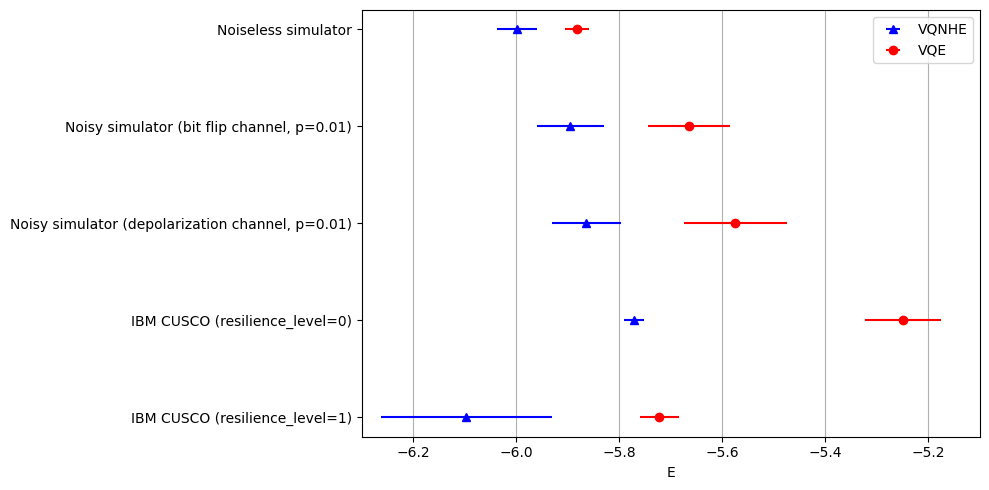

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data to mimic the plot
# Assuming there are two energy levels for each of the three categories
categories = ['Noiseless simulator', 'Noisy simulator (bit flip channel, p=0.01)', 'Noisy simulator (depolarization channel, p=0.01)',
              'IBM CUSCO (resilience_level=0)', 'IBM CUSCO (resilience_level=1)']
methods = ['VQNHE', 'VQE']
energies = {
    'Noiseless simulator':                                {'VQNHE': (np.mean(vqnhe_noiseless), np.sqrt(np.var(vqnhe_noiseless))),'VQE': (np.mean(vqe_noiseless), np.sqrt(np.var(vqe_noiseless)))},
    'Noisy simulator (bit flip channel, p=0.01)':         {'VQNHE': (np.mean(vqnhe_bitflip_1), np.sqrt(np.var(vqnhe_bitflip_1))), 'VQE': (np.mean(vqe_bitflip_1), np.sqrt(np.var(vqe_bitflip_1)))},
    'Noisy simulator (depolarization channel, p=0.01)':   {'VQNHE': (np.mean(vqnhe_depolarization_1), np.sqrt(np.var(vqnhe_depolarization_1))), 'VQE': (np.mean(vqe_depolarization_1), np.sqrt(np.var(vqe_depolarization_1)))},
    'IBM CUSCO (resilience_level=0)':                     {'VQNHE': (np.mean(vqnhe_cusco_0), np.sqrt(np.var(vqnhe_cusco_0))), 'VQE': (np.mean(vqe_cusco_0), np.sqrt(np.var(vqe_cusco_0)))},
    'IBM CUSCO (resilience_level=1)':                     {'VQNHE': (np.mean(vqnhe_cusco_1), np.sqrt(np.var(vqnhe_cusco_1))), 'VQE': (np.mean(vqe_cusco_1), np.sqrt(np.var(vqe_cusco_1)))},
}

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the data
for i, category in enumerate(categories):
    for j, method in enumerate(methods):
        mean, error = energies[category][method]
        marker = 'o' if method == 'VQE' else '^'
        color = 'red' if method == 'VQE' else 'blue'
        ax.errorbar(mean, i, xerr=error, fmt=marker, color=color, label=method if i == 0 else "")

# Customizing the plot
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)
ax.invert_yaxis()  # Invert y-axis to match the uploaded image
ax.set_xlabel('E')
ax.xaxis.grid(True)  # Add a grid on x-axis
ax.set_xlim(-6.30, -5.10)  # Set the limit for x-axis to match the uploaded image

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()

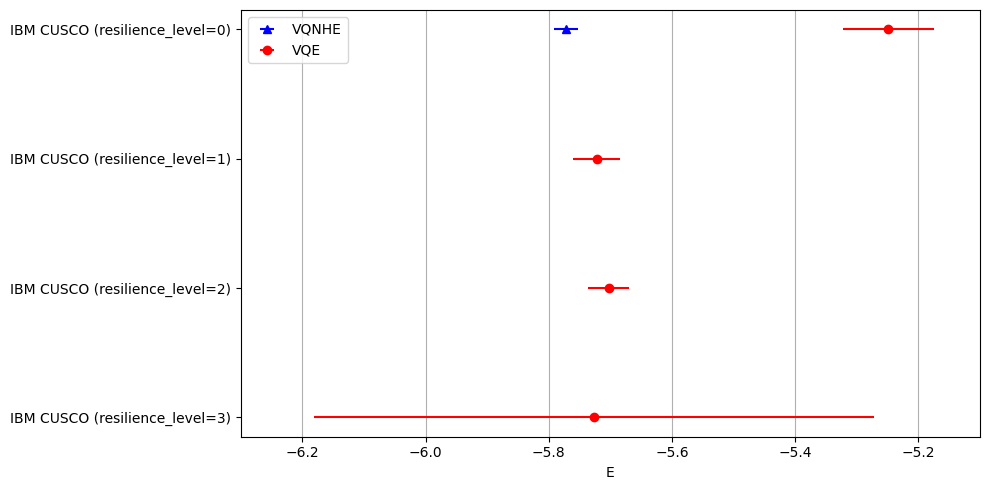

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data to mimic the plot
# Assuming there are two energy levels for each of the three categories
categories = ['IBM CUSCO (resilience_level=0)', 'IBM CUSCO (resilience_level=1)', 'IBM CUSCO (resilience_level=2)', 'IBM CUSCO (resilience_level=3)']
methods = ['VQNHE', 'VQE']
energies = {
    'IBM CUSCO (resilience_level=0)': {'VQNHE': (np.mean(vqnhe_cusco_0), np.sqrt(np.var(vqnhe_cusco_0))), 'VQE': (np.mean(vqe_cusco_0), np.sqrt(np.var(vqe_cusco_0)))},
    'IBM CUSCO (resilience_level=1)': {'VQNHE': (0, 0), 'VQE': (np.mean(vqe_cusco_1), np.sqrt(np.var(vqe_cusco_1)))},
    'IBM CUSCO (resilience_level=2)': {'VQNHE': (0, 0), 'VQE': (np.mean(vqe_cusco_2), np.sqrt(np.var(vqe_cusco_2)))},
    'IBM CUSCO (resilience_level=3)': {'VQNHE': (0, 0), 'VQE': (np.mean(vqe_cusco_3), np.sqrt(np.var(vqe_cusco_3)))},
}

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the data
for i, category in enumerate(categories):
    for j, method in enumerate(methods):
        mean, error = energies[category][method]
        marker = 'o' if method == 'VQE' else '^'
        color = 'red' if method == 'VQE' else 'blue'
        ax.errorbar(mean, i, xerr=error, fmt=marker, color=color, label=method if i == 0 else "")

# Customizing the plot
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)
ax.invert_yaxis()  # Invert y-axis to match the uploaded image
ax.set_xlabel('E')
ax.xaxis.grid(True)  # Add a grid on x-axis
ax.set_xlim(-6.30, -5.10)  # Set the limit for x-axis to match the uploaded image

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()